In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=5d4975007501cbb575933fc21a56303d04c95d2752248c312ab1f62d45ecb51c
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ModuleNotFoundError: ignored

#Definir las Variables Difusas

In [ ]:
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'Servicio')
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'Comida')
propina = ctrl.Consequent(np.arange(0, 21, 1), 'Propina')


#Definir los conjuntos difusos para las variables de servicio y comida.

Entendido, si deseas utilizar cuatro elementos en lugar de tres, puedes utilizar la función trapmf en lugar de trimf. La función trapmf permite definir un conjunto difuso trapezoidal con cuatro parámetros. Aquí está cómo puedes ajustar la línea para 'Pesimo':

In [ ]:
# Definir los conjuntos difusos para las variables de servicio y comida.
# Corregidos valores **** servicio['Pesimo'] = fuzz.trimf(servicio.universe, [1, 1, 3, 4])

servicio['Pesimo'] = fuzz.trapmf(servicio.universe, [1, 1, 3, 4])
servicio['Promedio'] = fuzz.trapmf(servicio.universe, [3, 4, 7, 8])
servicio['Excelente'] = fuzz.trapmf(servicio.universe, [7, 8, 10, 10])

comida['Desagradable'] = fuzz.trapmf(comida.universe, [1, 1, 3, 5])
comida['Aceptable'] = fuzz.trapmf(comida.universe, [4, 5, 7,8])
comida['Deliciosa'] = fuzz.trapmf(comida.universe, [7, 8.5, 10, 10])

In [ ]:
!python --version

Python 3.10.12


#Definir los conjuntos difusos para la variable propina

In [ ]:
# Definir los conjuntos difusos para la variable propina
propina['Nada'] = fuzz.trimf(propina.universe, [0, 0, 0])
propina['Poca'] = fuzz.trimf(propina.universe, [2, 5, 8])
propina['Normal'] = fuzz.trimf(propina.universe, [7, 10, 14.07])
propina['Generosa'] = fuzz.trapmf(propina.universe, [12.7, 18, 20.1, 20.1])

#Definir las reglas

In [ ]:
# Definir las reglas
rule1 = ctrl.Rule(comida['Desagradable'] & servicio['Pesimo'], propina['Nada'])
rule2 = ctrl.Rule(comida['Desagradable'] & servicio['Promedio'], propina['Nada'])
rule3 = ctrl.Rule(comida['Desagradable'] & servicio['Excelente'], propina['Poca'])

rule4 = ctrl.Rule(comida['Aceptable'] & servicio['Pesimo'], propina['Nada'])
rule5 = ctrl.Rule(comida['Aceptable'] & servicio['Promedio'], propina['Normal'])
rule6 = ctrl.Rule(comida['Aceptable'] & servicio['Excelente'], propina['Normal'])

rule7 = ctrl.Rule(comida['Deliciosa'] & servicio['Pesimo'], propina['Nada'])
rule8 = ctrl.Rule(comida['Deliciosa'] & servicio['Promedio'], propina['Normal'])
rule9 = ctrl.Rule(comida['Deliciosa'] & servicio['Excelente'], propina['Generosa'])

<h1>Visualizar</h1>

In [ ]:
!pip install matplotlib

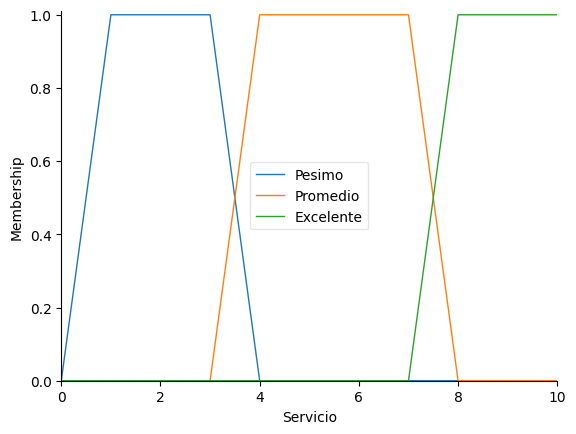

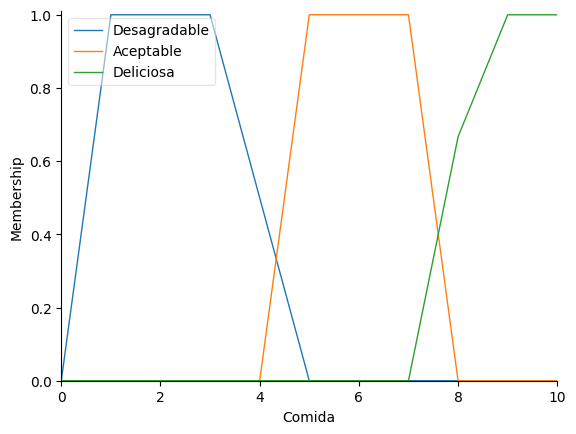

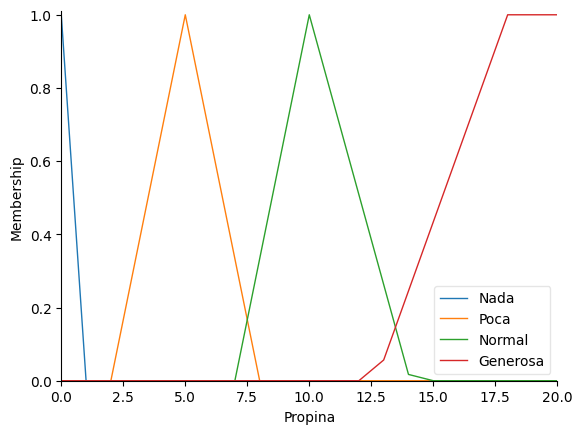

In [ ]:
import matplotlib.pyplot as plt
# Visualizar los conjuntos difusos y las reglas
servicio.view()
comida.view()
propina.view()
plt.show()  # Muestra la visualización en pantalla

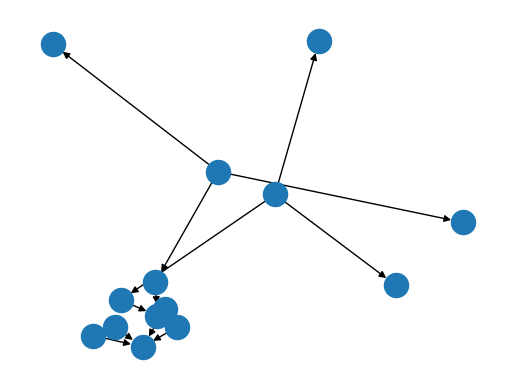

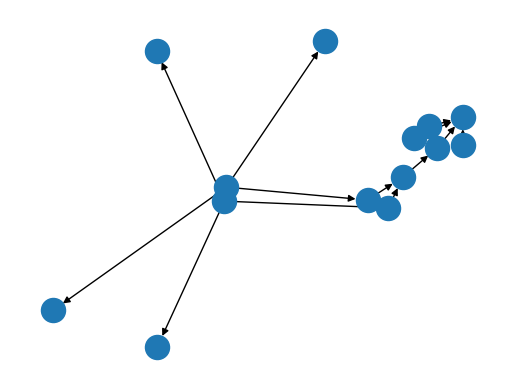

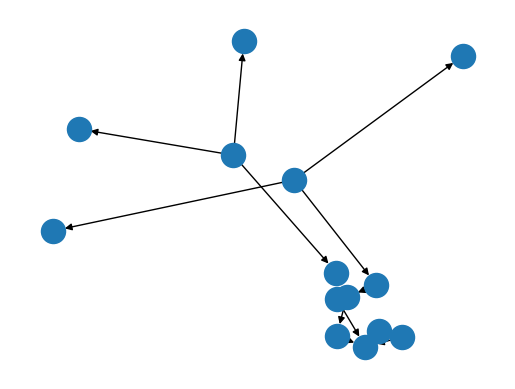

In [ ]:
# También puedes visualizar las reglas
rule1.view()
rule2.view()
rule3.view()
# ... visualizar las demás reglas
plt.show()  # Muestra la visualización en pantalla

<h1>Crear el sistema de control difuso</h1>


In [ ]:
# Crear el sistema de control difuso
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

#Crear una simulación del sistema de control difuso.

In [ ]:
# Crear una simulación del sistema de control difuso.
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

# Establecer los insumos de calidad del servicio y calidad de los alimentos.


In [ ]:
# Establecer los insumos de calidad del servicio y calidad de los alimentos.
fuzzy_system.input['Servicio'] = 5.5
fuzzy_system.input['Comida'] = 8.4

# Calcular la salida del sistema de control difuso

In [ ]:
# Calcular la salida del sistema de control difuso
fuzzy_system.compute()

# Obtener el monto de la propina

In [ ]:
# Obtener el monto de la propina
tip_amount = fuzzy_system.output['Propina']

# Imprimir el monto de la propina

In [ ]:
# Imprimir el monto de la propina
print(tip_amount)

10.377932058709419
